In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_csv('seoul_apratment_price_fix.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)



In [104]:
df['년'] = df['계약일']//10000
df['년월'] = df['계약일']//100

df.head()

,구,동,건물명,계약일,매매가,면적,층,건축년도,위도,경도,년,년월
0,마포구,신공덕동,대우메트로디오빌,20240219,40000,34.39,19,2005.0,37.544079,126.955906,2024,202402
1,강동구,성내동,광남캐스빌(448-5),20240219,60000,81.62,8,2001.0,37.530493,127.128992,2024,202402
2,도봉구,방학동,신동아타워아파트,20240219,43000,84.74,15,1997.0,37.664817,127.042420,2024,202402
3,양천구,신정동,목동신시가지12,20240217,139500,71.64,15,1988.0,37.515180,126.855709,2024,202402
4,양천구,신월동,목동센트럴아이파크위브4단지,20240217,107500,84.98,18,2020.0,37.526429,126.834227,2024,202402


In [105]:
new_column_names = {'구': 'Gu', '동': 'Dong','건물명': 'Name', '계약일': 'Date', '매매가': 'Price', '면적': 'Area', '층': 'Floor', '건축년도': 'Construction Year', '위도': 'Latitude', '경도': 'Longitude', '년': 'Year', '년월': 'Month'}
df = df.rename(columns=new_column_names)

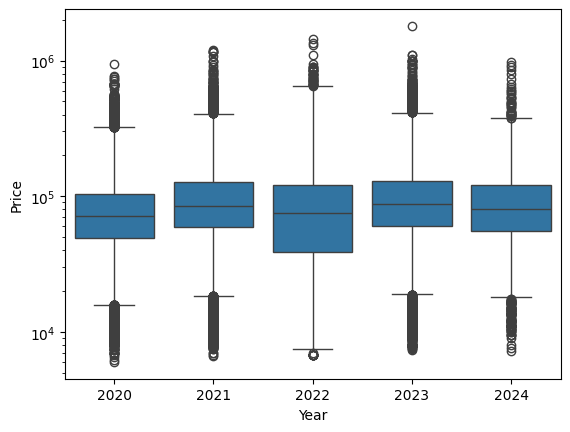

In [106]:
sns.boxplot(x=df['Year'], y=df['Price'], log_scale=True)
plt.show()

In [107]:
indices_to_change = df.index[df['Dong'] == '중동'].tolist()

desired_latitude = 37.569114
desired_longitude = 126.909594

for idx in indices_to_change:
    df.at[idx, 'Latitude'] = desired_latitude
    df.at[idx, 'Longitude'] = desired_longitude

In [108]:
df['Price_log'] = np.log(df['Price'])

In [109]:
df['Price_log'].describe()

count    180521.000000
mean         11.243637
std           0.676746
min           8.699515
25%          10.870471
50%          11.264464
75%          11.674194
max          14.403297
Name: Price_log, dtype: float64

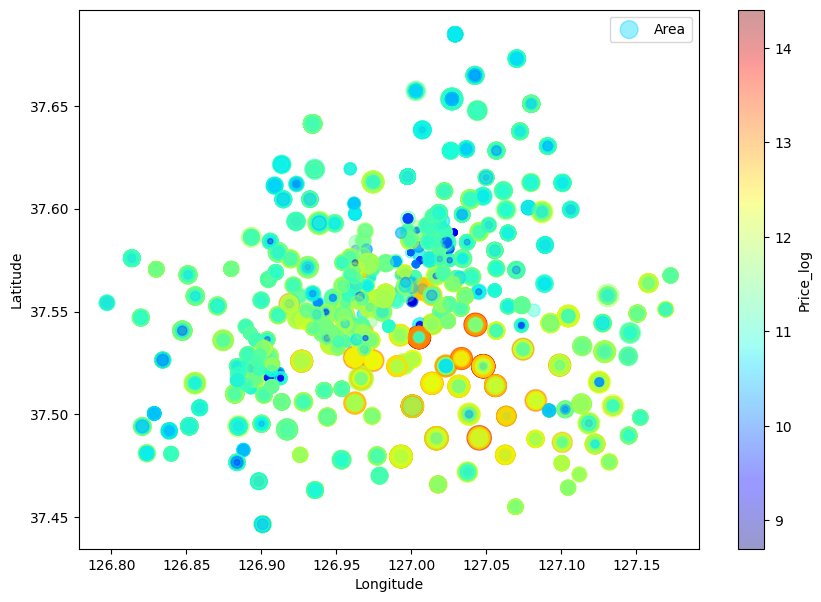

In [110]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=df["Area"], label="Area", figsize=(10,7),
    c="Price_log", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

In [111]:
df.to_csv('seoul_apratment_price_fix_eng.csv')

In [112]:
df.head()

,Gu,Dong,Name,Date,Price,Area,Floor,Construction Year,Latitude,Longitude,Year,Month,Price_log
0,마포구,신공덕동,대우메트로디오빌,20240219,40000,34.39,19,2005.0,37.544079,126.955906,2024,202402,10.596635
1,강동구,성내동,광남캐스빌(448-5),20240219,60000,81.62,8,2001.0,37.530493,127.128992,2024,202402,11.002100
2,도봉구,방학동,신동아타워아파트,20240219,43000,84.74,15,1997.0,37.664817,127.042420,2024,202402,10.668955
3,양천구,신정동,목동신시가지12,20240217,139500,71.64,15,1988.0,37.515180,126.855709,2024,202402,11.845820
4,양천구,신월동,목동센트럴아이파크위브4단지,20240217,107500,84.98,18,2020.0,37.526429,126.834227,2024,202402,11.585246
